# IntraDay Decision Tree

Attempt similar strategy to previous Decision Tree technique with technical indicators except using intraday data.

Data source : http://www.histdata.com/download-free-forex-historical-data/?/metatrader/1-minute-bar-quotes/EURUSD

## Prerequisites : 
- Download a couple months worth of intraday data
- Copy the \*.csv files into /data/histdata folder

In [1]:
from os import listdir
from ta import *
import pandas, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
data_dir = 'data/histdata/'
data_files = list(filter(lambda a : ('.csv' in a), listdir(data_dir)))
data_files

['DAT_MT_EURUSD_M1_201809.csv',
 'DAT_MT_EURUSD_M1_201808.csv',
 'DAT_MT_EURUSD_M1_201805.csv',
 'DAT_MT_EURUSD_M1_201804.csv',
 'DAT_MT_EURUSD_M1_201806.csv',
 'DAT_MT_EURUSD_M1_201807.csv']

In [5]:
df = pandas.read_csv(data_dir + 'DAT_MT_EURUSD_M1_201809.csv', names=['date','time','open', 'max', 'min', 'close', 'vol'])
df.describe()

,open,max,min,close,vol
count,14348.000000,14348.000000,14348.000000,14348.000000,14348.0
mean,1.161197,1.161272,1.161121,1.161197,0.0
std,0.003702,0.003702,0.003704,0.003702,0.0
min,1.152790,1.152940,1.152600,1.152740,0.0
25%,1.158650,1.158710,1.158580,1.158640,0.0
50%,1.161040,1.161150,1.160950,1.161040,0.0
75%,1.162930,1.163020,1.162860,1.162930,0.0
max,1.172130,1.172150,1.171950,1.172120,0.0


In [6]:
df['datetime'] = df['date'] + ' - ' + df['time']

In [7]:
df

,date,time,open,max,min,close,vol,datetime
0,2018.09.02,17:00,1.15950,1.15951,1.15950,1.15951,0,2018.09.02 - 17:00
1,2018.09.02,17:01,1.15951,1.15951,1.15951,1.15951,0,2018.09.02 - 17:01
2,2018.09.02,17:02,1.15950,1.15950,1.15950,1.15950,0,2018.09.02 - 17:02
3,2018.09.02,17:05,1.15951,1.15951,1.15951,1.15951,0,2018.09.02 - 17:05
4,2018.09.02,17:06,1.15950,1.15950,1.15950,1.15950,0,2018.09.02 - 17:06
5,2018.09.02,17:08,1.15950,1.15952,1.15950,1.15952,0,2018.09.02 - 17:08
6,2018.09.02,17:09,1.15991,1.15991,1.15950,1.15952,0,2018.09.02 - 17:09
7,2018.09.02,17:10,1.15950,1.15952,1.15950,1.15950,0,2018.09.02 - 17:10
8,2018.09.02,17:18,1.15927,1.15935,1.15923,1.15935,0,2018.09.02 - 17:18
9,2018.09.02,17:19,1.15935,1.15938,1.15935,1.15938,0,2018.09.02 - 17:19


In [8]:
def readDAT(filename):
    dateparse = lambda x: pd.datetime.strptime(x, '%Y.%m.%d')
#     df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
    
    df = pandas.read_csv(filename, names=['date','time','open', 'max', 'min', 'close', 'vol'])
    df['datetime'] = df['date'] + ' - ' + df['time']
    df['datetime'] = pandas.to_datetime(df['datetime'], format='%Y.%m.%d - %H:%M')
    return df
    
def readAllDatForCurrency(data_dir, currencyCode):
    dataFileNames = list(filter(lambda a : (currencyCode in a), listdir(data_dir)))
    dfs = [readDAT(data_dir + name) for name in dataFileNames]
    allDf = pd.concat(dfs)
    allDf = allDf.sort_values(by=['datetime'], ascending=True).reset_index(drop=True).set_index('datetime')
    return allDf
    
def runCalculators(series, calculators=[]):
    df_obj = {}
    for ind, fn in enumerate(calculators):
        df_obj[fn.__name__] = fn(series)
    return pd.DataFrame(df_obj)


def splitData(df, split):
    train = df.iloc[:int(len(df)*split)]
    test = df.iloc[int(len(df)*split):]
    
    return train, test


def trainDecisionTree(inputDf, outputDf):
    clf = DecisionTreeRegressor(random_state=0)
    clf.fit(inputDf, outputDf)
    return clf


def makeTrades(predictions):
#     ceil = np.percentile(predictions, 75)
#     floor = np.percentile(predictions, 50)
    buy_thresh = np.percentile(predictions, 80)
    sell_thresh = np.percentile(predictions, 20)
    
    buy_pos = np.where(predictions > buy_thresh)[0]
    sell_pos = np.where(predictions < sell_thresh)[0]
    return [buy_pos, sell_pos]

def getCompoundGains(series, trades):
    buy_pos = trades[0]
    sell_pos = trades[1]
    trades = buy_pos
    
    gains = others.daily_return(series).shift(-1)[trades]
    gains = np.add(np.divide(gains, 100), 1.0)
    return np.product(gains)

In [9]:
allDf = readAllDatForCurrency(data_dir, 'EURUSD')
# allDf.sort_values(by=['datetime'], ascending=True).reset_index(drop=True)
allDf

,date,time,open,max,min,close,vol
datetime,,,,,,,
2018-04-01 17:00:00,2018.04.01,17:00,1.23186,1.23207,1.23186,1.23207,0
2018-04-01 17:02:00,2018.04.01,17:02,1.23209,1.23209,1.23207,1.23207,0
2018-04-01 17:03:00,2018.04.01,17:03,1.23212,1.23212,1.23212,1.23212,0
2018-04-01 17:05:00,2018.04.01,17:05,1.23207,1.23207,1.23202,1.23203,0
2018-04-01 17:06:00,2018.04.01,17:06,1.23205,1.23205,1.23205,1.23205,0
2018-04-01 17:07:00,2018.04.01,17:07,1.23206,1.23206,1.23200,1.23200,0
2018-04-01 17:08:00,2018.04.01,17:08,1.23198,1.23207,1.23198,1.23207,0
2018-04-01 17:09:00,2018.04.01,17:09,1.23208,1.23210,1.23208,1.23210,0
2018-04-01 17:10:00,2018.04.01,17:10,1.23209,1.23210,1.23209,1.23210,0


In [10]:
allDf.close.rolling('30min')

Rolling [window=1800000000000,min_periods=1,center=False,win_type=freq,axis=0]

In [11]:
allDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172247 entries, 2018-04-01 17:00:00 to 2018-09-14 16:58:00
Data columns (total 7 columns):
date     172247 non-null object
time     172247 non-null object
open     172247 non-null float64
max      172247 non-null float64
min      172247 non-null float64
close    172247 non-null float64
vol      172247 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 15.5+ MB


In [13]:
wind = {
    'periods' : 30,
    'freq' : 'min'
}

def calcGain(series):
    returns = np.divide(others.daily_return(series), 100)
    rollRetSum = returns.rolling(str(wind['periods'])+wind['freq']).sum()
    return rollRetSum.shift(-1 * wind['periods'], freq=wind['freq'])


input_calculators=[trend.dpo, trend.macd, trend.macd_signal, trend.macd_diff, momentum.tsi, momentum.rsi, trend.trix, volatility.bollinger_hband, volatility.bollinger_lband]
output_calculators=[calcGain]
def runDTBacktest(df, 
                  filename=None,
                  input_calculators=input_calculators,
                  output_calculators=output_calculators,
                  make_trades=makeTrades,
                  calc_gains=getCompoundGains):
    
    df_inds = runCalculators(df.close, input_calculators)
    df_outs = runCalculators(df.close, output_calculators)
    df = pd.concat([df, df_inds, df_outs], axis=1, join_axes=[df.index])
    df = df.dropna()
    df_inds = df[df_inds.columns]
    df_outs = df[df_outs.columns]
    
    train_split = 0.9
    train_in, test_in = splitData(df_inds, train_split)
    train_out, test_out = splitData(df_outs, train_split)
    
    decTree = trainDecisionTree(train_in, train_out)
    preds = decTree.predict(test_in)
    test_out['preds'] = preds
    trades = make_trades(preds)
    totalGain = calc_gains(df.close, trades)
    
    return {
        'filename':filename,
        'gain' : totalGain,
        'dt' : decTree,
        'df':df,
        'preds':preds,
        'trades':trades,
        'test_df':pd.concat([df, test_in, test_out], axis=1, join_axes=[test_in.index])
    }

# metrics
def getMetrics(backTestResult):
    
    returns = np.add(np.divide(others.daily_return(backTestResult['test_df'].close),100),1)
    
    return {
        'filename' : backTestResult['filename'],
        'gain' : backTestResult['gain'],
        'total_gain' : np.product(returns),
        'beat_market' : backTestResult['gain'] > np.product(returns),
        'start_date' : backTestResult['test_df']['date'].iloc[0],
        'end_date' : backTestResult['test_df']['date'].iloc[-1]
#         'perfect_gain' : np.product(returns[np.where(returns > 1.0)])
    }


In [14]:
results = runDTBacktest(readAllDatForCurrency(data_dir, 'EURUSD'))

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
sortedResults = sorted(list(map(getMetrics, [results])), key=lambda x: x['gain'])
sortedResults.reverse()
sortedResults

[{'filename': None,
  'gain': 0.9921911605544612,
  'total_gain': 0.9931066883061399,
  'beat_market': False,
  'start_date': '2018.08.29',
  'end_date': '2018.09.14'}]

## Using Moving Averages in Output Column

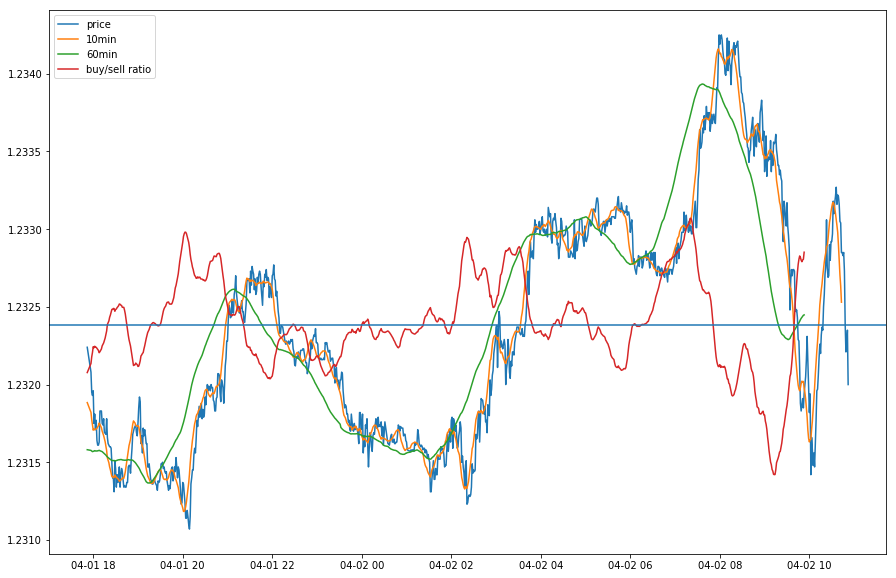

In [16]:
tmpDf = results['df'].iloc[:1000]

shortWind = 10
longWind = 60

shortMa = tmpDf.close.rolling(str(shortWind)+'min').mean().shift(-shortWind)
longMa = tmpDf.close.rolling(str(longWind)+'min').mean().shift(-longWind)

# Calc Buy hold and Sell signals
buySellRatio = longMa - shortMa + shortMa.mean()

plt.plot(tmpDf.index, tmpDf.close.rolling('1min').mean().shift(-1))
plt.plot(tmpDf.index, shortMa)
plt.plot(tmpDf.index, longMa)
# plt.plot(tmpDf.index, shortMa.rolling('40min').mean().shift(-20))
plt.plot(tmpDf.index, buySellRatio)
plt.axhline(shortMa.mean())

plt.legend(['price', str(shortWind)+'min', str(longWind)+'min', 'buy/sell ratio'], loc='upper left')

In [17]:
def calcSmoothedGains(series, shortWind, longWind):
    shortMa = series.rolling(str(shortWind)+'min').mean().shift(-shortWind)
    longMa = series.rolling(str(longWind)+'min').mean().shift(-longWind)

    # Calc Buy hold and Sell signals
    buySellRatio = longMa - shortMa
    return buySellRatio

In [61]:
def getTradePairs(predictions, buy_confidence=2, sell_confidence=2):
    smooth_preds = pd.Series(predictions).rolling(5).mean()
    buy_thresh = np.mean(smooth_preds) + buy_confidence * np.std(smooth_preds)
    sell_thresh = np.mean(smooth_preds) - sell_confidence * np.std(smooth_preds)
    buy_positions = np.where(predictions > buy_thresh)[0]
    sell_positions = np.where(predictions < sell_thresh)[0]
    
    buys = buy_positions
    sells = []
    curSell = 0
    for curBuy in buys:
        arr = np.where(sell_positions > curBuy)[0]
        if len(arr):
            sells.append(sell_positions[arr[0]])
    tradePairs = list(zip(buys, sells))
    return tradePairs

In [104]:
def getBuySellGains(series, trades):
    cumGains = others.daily_return(series).cumsum().fillna(0)
    tradeGains = [cumGains[t[1]] - cumGains[t[0]] for t in trades]
    tradeGains = np.add(np.divide(tradeGains, 100), 1.0)
    return np.product(tradeGains)

## Run BackTest

In [106]:
pairs = ["AUDJPY", "EURAUD", "EURGBP", "EURUSD", "USDCAD", "USDMXN", "EURCAD", "GBPUSD", "USDJPY"]
#pairs = ["USDCAD"]
results = []
for pair in pairs:
    print('Executing : ', pair)
    tmpRes = runDTBacktest(readAllDatForCurrency(data_dir, pair),
                           filename=pair,
                            output_calculators=[lambda s : calcSmoothedGains(s, 30, 6*60)],
                            make_trades=lambda preds : getTradePairs(preds, buy_confidence=1.5, sell_confidence=1.1),
                            calc_gains=getBuySellGains)
    results.append(tmpRes)

sortedResults = sorted(list(map(getMetrics, results)), key=lambda x: x['gain'])
sortedResults.reverse()
sortedResults

Executing :  AUDJPY


/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Executing :  EURAUD
Executing :  EURGBP
Executing :  EURUSD
Executing :  USDCAD
Executing :  USDMXN
Executing :  EURCAD
Executing :  GBPUSD
Executing :  USDJPY


[{'filename': 'USDMXN',
  'gain': 1.6665284961464126,
  'total_gain': 0.9725421005127961,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'EURAUD',
  'gain': 1.4236712817209354,
  'total_gain': 1.00804885162684,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'GBPUSD',
  'gain': 1.2673317542129994,
  'total_gain': 1.016709041854222,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'EURCAD',
  'gain': 1.1606840952748392,
  'total_gain': 0.9962211263270248,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'AUDJPY',
  'gain': 1.049362125611264,
  'total_gain': 1.000385241521579,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'EURUSD',
  'gain': 1.0439638610946915,
  'total_gain': 0.9973328090137368,
  'beat_market': True,
  'start_date': '2018.08.29',
  

In [109]:
total = list(filter(lambda v: v==v, map(lambda res : res['gain']-res['total_gain'], sortedResults)))
print('Total winnings', total)
np.sum(total)

Total winnings [0.6939863956336165, 0.4156224300940954, 0.2506227123587774, 0.16446296894781443, 0.048976884089684924, 0.04663105208095475, -0.02434265839918348, -0.050730143505473, -0.08805087205159001]


1.4571787692486968

## Debugging/Analysing Individual Result Set

In [91]:
curResult = results[0]

In [103]:
# getBuySellGains(curResult['test_df']['close'], curResult['trades'])
series = curResult['test_df']['close']
trades = curResult['trades']

cumGains = others.daily_return(series).cumsum().fillna(0)
tradeGains = [cumGains[t[1]] - cumGains[t[0]] for t in trades]
tradeGains = np.add(np.divide(tradeGains, 100), 1.0)
np.product(tradeGains)

1.0086250747115206

In [92]:
buyPositionInd = [a[0] for a in curResult['trades']]
sellPositionInd = np.unique([a[1] for a in curResult['trades']])

indsOfBuys = curResult['test_df'].iloc[buyPositionInd].index
indsOfSells = curResult['test_df'].iloc[sellPositionInd].index
curResult['test_df']['buySig'] = curResult['test_df']['close'][indsOfBuys]
curResult['test_df']['sellSig'] = curResult['test_df']['close'][indsOfSells]

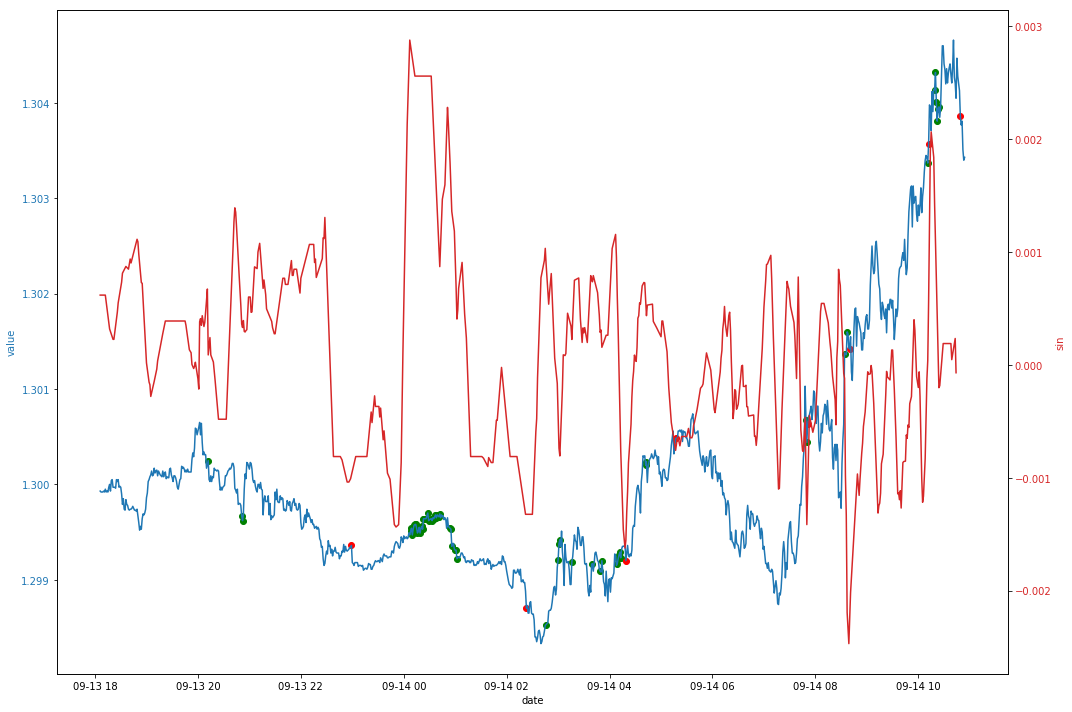

In [93]:
tmpDf = curResult['test_df'][-1000:]

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('value', color=color)
ax1.plot(tmpDf.index, tmpDf['close'], color=color)
ax1.scatter(tmpDf.index, tmpDf['buySig'], color='green')
ax1.scatter(tmpDf.index, tmpDf['sellSig'], color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(tmpDf.index, tmpDf['preds'], color='red')
ax2.plot(tmpDf.index, tmpDf['preds'].rolling(10).mean().shift(-10), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()